In [15]:
library(ggplot2)
library(dplyr)
library(knitr)
library(gridExtra)
library(memisc)
options(repr.plot.width=6, repr.plot.height=4)


In [16]:
#Load the data

setwd('~/Downloads')
wine <- read.csv('wineQualityWhites.csv')

## The White Wine Data Set

This data set contains 4898 observations of 12 variables (13 if you count X, which just appears to be another index). All variables are quantitative measures of properties of white wines. The variable 'quality' is of the type integer, since quality ratings only appear as whole numbers. Every other column is numeric.

### Univariate Plots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


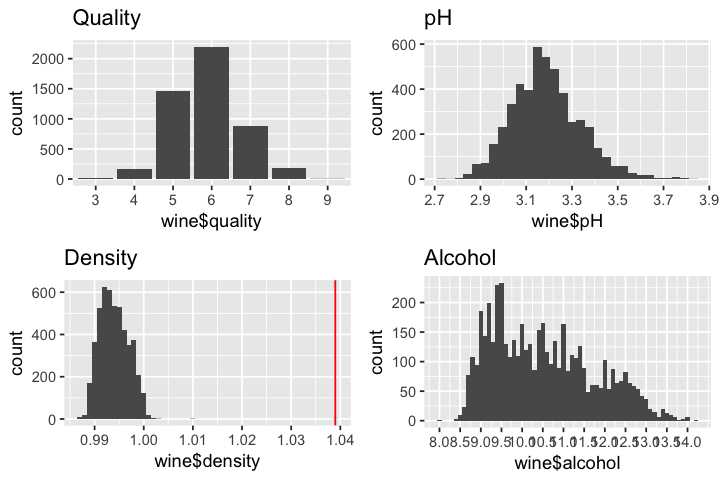

In [127]:
p1 <- qplot(wine$quality) + 
    ggtitle('Quality')

p2 <- qplot(wine$pH) + 
  scale_x_continuous(breaks = seq(2.7, 3.9, .2)) + 
  ggtitle('pH')

dens_max <- max(wine$density)

p3 <- qplot(wine$density, binwidth = .001) + 
  scale_x_continuous(breaks = seq(0, 1.04, .01)) + 
  geom_vline(xintercept = dens_max, color = 'red') + 
  ggtitle('Density')

p4 <- qplot(wine$alcohol, binwidth = .10) + 
  ggtitle('Alcohol') + 
  scale_x_continuous(breaks = seq(8, 14, .5))

grid.arrange(p1, p2, p3, p4, nrow=2);

Quality values show a fairly normal distribution, with values ranging between 3 and 9, and most values falling between 5 and 7. The mode score is 6.

The pH values in the data set appear to be normally distributed, with most values falling bewteen 2.9 and 3.5.

The max density value is 1.0390, well beyond the bulk of the data which is between .99 and 1.00. The data is otherwise normally distributed.

Alcohol content appears to be slightly right skewed, with more wines having content between 9 and 10.5 versus 11 and 13.5.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.800   6.300   6.800   6.855   7.300  14.200 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


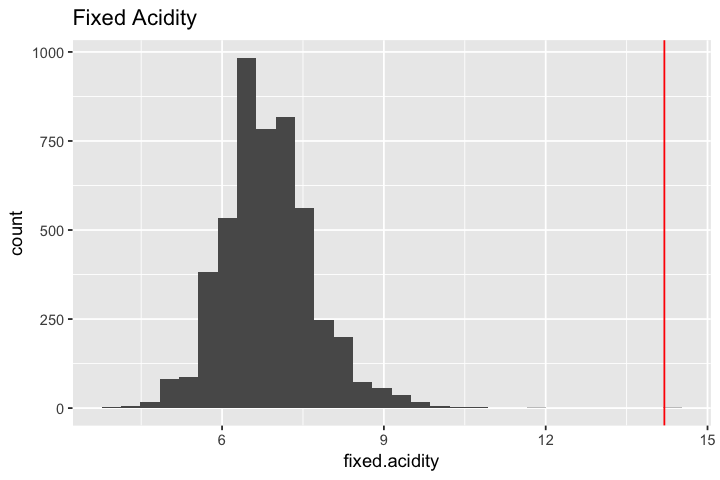

In [122]:
summary(wine$fixed.acidity)
max_acidity <- max(wine$fixed.acidity)

ggplot(data = wine, aes(fixed.acidity))  +
  geom_histogram() + 
  geom_vline(xintercept = max_acidity, color = 'red')+
  ggtitle('Fixed Acidity');

Fixed Acidity also has a normal distribution with a max value that lies very far away from the mean.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   1.700   5.200   6.391   9.900  65.800 

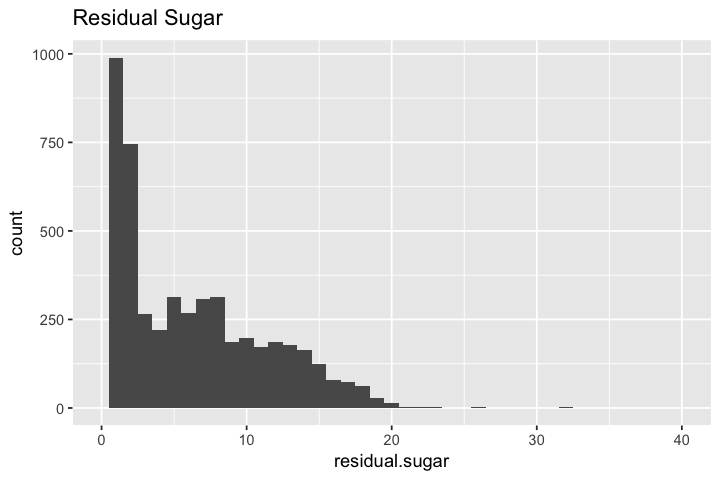

In [123]:
summary(wine$residual.sugar)

ggplot(data = wine, aes(residual.sugar))  +
geom_histogram(binwidth = 1) + 
  coord_cartesian(xlim = c(0, 40))+
  ggtitle('Residual Sugar');

Residual sugar is right skewed, with most values being on the lower end (75% fall below 9.9), but the maximum being all the way at 65.8. 

### Univariate Analysis

All of the variables, aside from the quality rating, appear to be chemical properties of wine. Some of the variables are normally distributed, while others are left or right skewed. A few of the variables have outliers, such as fixed acidity, density, and residual sugar.

Quality and alcohol content are two of the most accessible and easy to understand variables, so it will be interesting to look at what chemical properties are associated with changes in these variables.

Residual sugar and fixed acidity affect the taste of wine - high residual sugar values make for a sweet wine, and high fixed acidity values indicate a sourness or tartness. It will be interesting to compare the two and see what other properties go along with these strong taste indicators.

### Bivariate Plots 

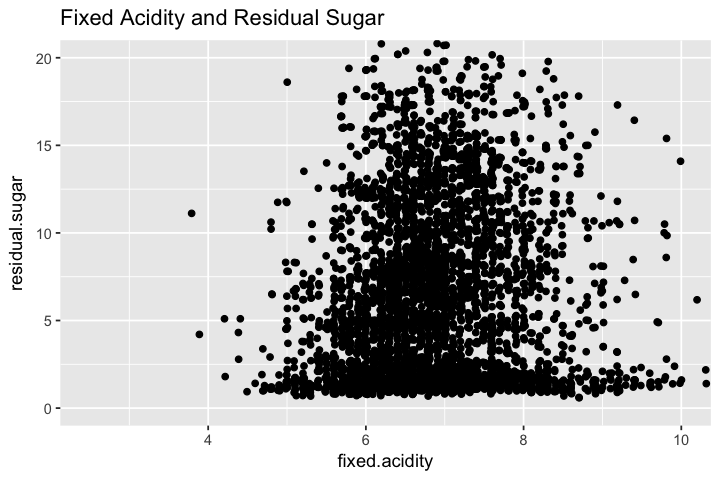

In [134]:
ggplot(aes(x = fixed.acidity, y = residual.sugar), data = wine)+
  geom_point(position = 'jitter') +
  coord_cartesian(xlim = c(2.5, 10), ylim = c(0,20))+
  ggtitle('Fixed Acidity and Residual Sugar')

I assumed there might be a negative relationship between residual sugar and fixed acidity since they have different effects on the taste of wine, but this does not appear to be the case. There is not a strong relationship between the two variables. The ggpairs grid shows a correlation coefficient of .089.

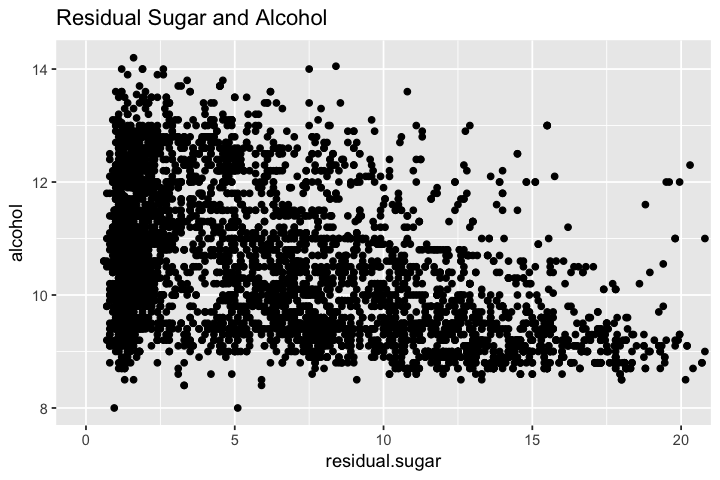

In [136]:
ggplot(aes(x = residual.sugar, y = alcohol), data = wine) + 
  geom_point() +
  coord_cartesian(xlim= c(0, 20)) + 
  ggtitle('Residual Sugar and Alcohol')

Here we see a moderately strong negative relationship. The correlation coefficient between alcohol and residual sugar is -.451, meaning that there is a somewhat downward trend in residual sugar as alcohol content increases. This makes sense, as from what I understand, the sugar in grapes is what is fermented into alcohol.

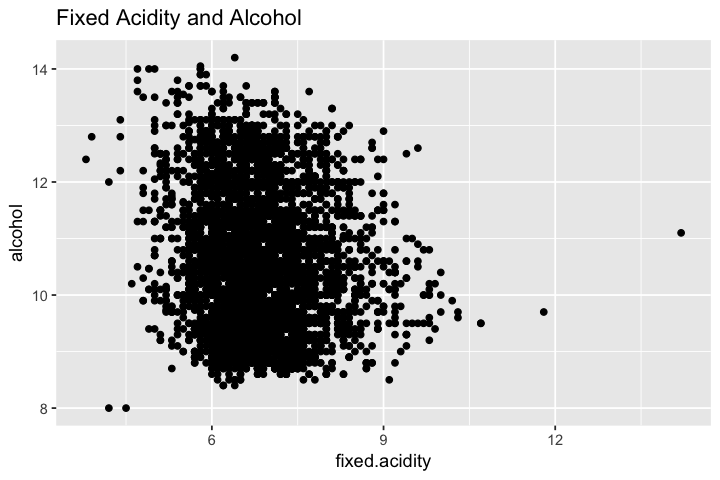

In [137]:
ggplot(aes(x = fixed.acidity, y = alcohol), data = wine)+
  geom_point() + 
  ggtitle('Fixed Acidity and Alcohol')

There's a weak negative relationship here (correlation of -.121), which is quite a bit weaker than the relationship between residual sugar and alcohol. Let's see if we can find a variable that has a stronger relationship to fixed acidity.

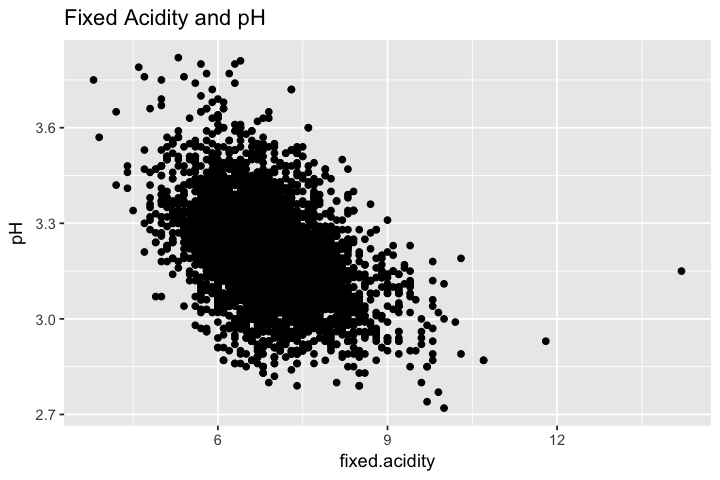

In [138]:
ggplot(aes(x = fixed.acidity, y = pH), data = wine)+
  geom_point() + 
  ggtitle('Fixed Acidity and pH')

According to the ggpairs grid of correlation coefficients, fixed acidity is most strongly related to pH, with a correlation coefficient of -.426. It makes sense that wines with lower pHs also have lower fixed acidity, since a low pH indicates acidity.

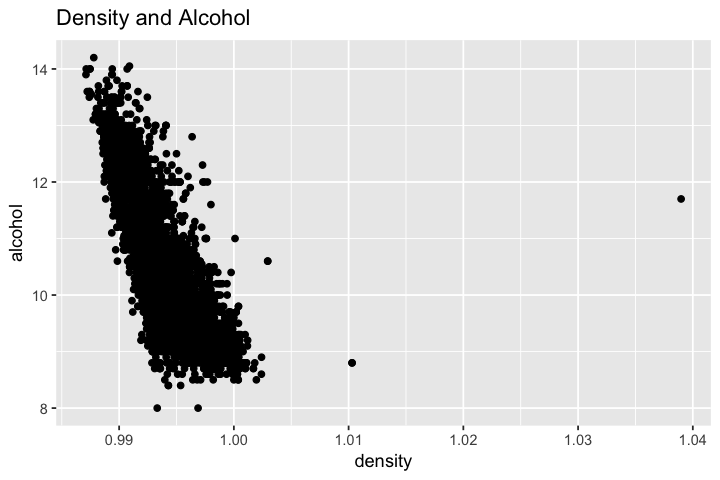

In [139]:
ggplot(aes(x = density , y = alcohol), data = wine)+
  geom_point() + 
  ggtitle('Density and Alcohol')

There is a strong negative relationship between density and alcohol: -.78. This means that wines with higer alcohol contents tend to have lower densities. 

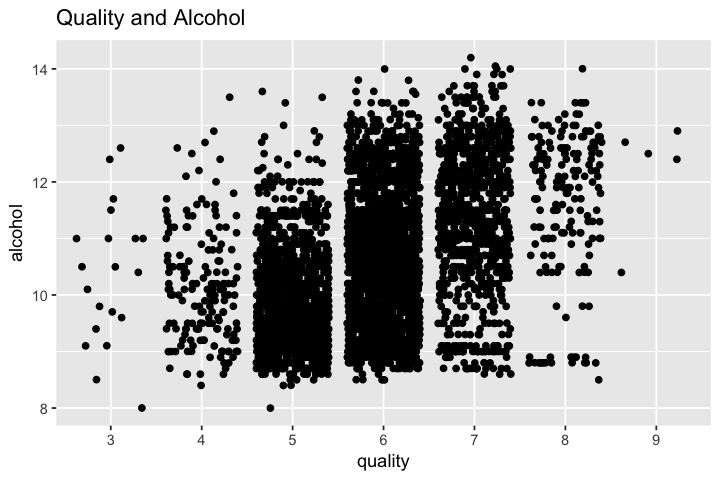

In [140]:
ggplot(aes(x = quality , y = alcohol), data = wine)+
  geom_point(position = 'jitter') + 
  ggtitle('Quality and Alcohol')

Alcohol and quality have a correlation of .436, so higher alcohol wines tend to have higher quality ratings, though there is a lot of variability for almost every score. 

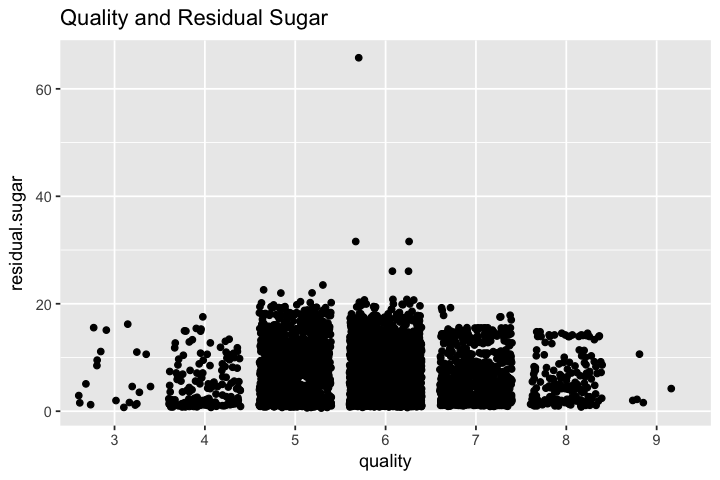

In [141]:
ggplot(aes(x = quality , y = residual.sugar), data = wine)+
  geom_point(position = 'jitter') + 
  ggtitle('Quality and Residual Sugar')

While alcohol and residual sugar are negatively correlated, and alcohol and quality and positively correlated, quality and residual sugar do not appear to have a strong relationship. The correlation coefficient is -.0976, indicating a weak negative relationship. From the plot, it is hard to see a trend or relationship between the variables. 

[1] 0.8389665

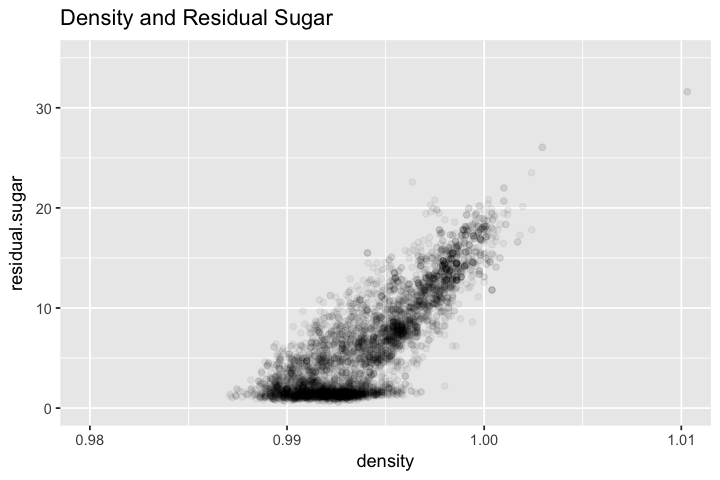

In [142]:
ggplot(aes(x = density , y = residual.sugar), data = wine) +
  geom_point(position = 'jitter', alpha = 1/20) + 
  coord_cartesian(xlim=c(.98, 1.01), ylim = c(0, 35)) + 
  ggtitle('Density and Residual Sugar')
cor(wine$density, wine$residual.sugar) 

Density and residual sugar have a very strong positive relationship. This is the strongest correlation of any two variables in the data set. As residual sugar increases, density increases in what appears to be a linear manner.

### Bivariate Analysis

Some variables have very strong correlations, like density and residual sugar, and density and alcohol, or moderately strong correlations, like alcohol and residual sugar. I expected residual sugar and fixed acidity to have perhaps a negative correlation, since they cause different tastes in wine (sweet versus sour/acidic), but they merely had a weak positive relationship.

### Multivariate Plots

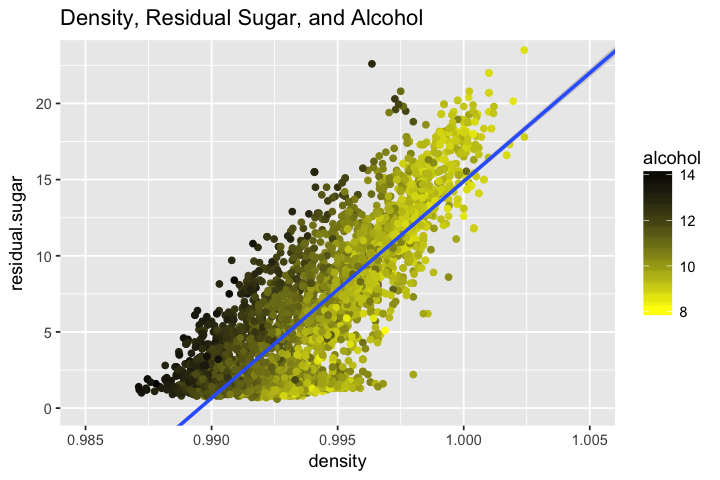

In [143]:
ggplot(aes(x = density, y = residual.sugar, color = alcohol), data = wine) + 
  geom_point() +
  scale_color_continuous(low = 'yellow', high = 'black') +
  coord_cartesian(xlim=c(.985, 1.005), ylim = c(0, 23)) +
  ggtitle('Density, Residual Sugar, and Alcohol') +
  geom_smooth(method='lm')

In [144]:
lm1 <- lm(density ~ residual.sugar, data = wine)
lm2 <- update(lm1, ~ . + alcohol)
mtable(lm1, lm2)

Calls:
lm1: lm(formula = density ~ residual.sugar, data = wine)
lm2: lm(formula = density ~ residual.sugar + alcohol, data = wine)

================================================
                       lm1            lm2       
------------------------------------------------
  (Intercept)          0.991***       1.005***  
                      (0.000)        (0.000)    
  residual.sugar       0.000***       0.000***  
                      (0.000)        (0.000)    
  alcohol                            -0.001***  
                                     (0.000)    
------------------------------------------------
  R-squared            0.704          0.907     
  adj. R-squared       0.704          0.907     
  sigma                0.002          0.001     
  F                11636.984      23791.076     
  p                    0.000          0.000     
  Log-likelihood   24498.873      27328.019     
  Deviance             0.013          0.004     
  AIC             -48991.747     -54648.037     
  BIC             -48972.257     -54622.051     
  N                 4898           4898         
================================================

Density/residual sugar correlation: 

In [145]:
cor(wine$density, wine$residual.sugar)

[1] 0.8389665

Fixed acidity/quality correlation: 

In [146]:
wine$quality <- as.numeric(wine$quality)
cor(wine$fixed.acidity, wine$quality)

[1] -0.1136628

Once again, density and residual sugar have a strong positive, linear relationship. You can see much more of a relationship between alcohol and density (the color changes from left to right more than it changes from top to bottom) than alcohol and residual sugar. Running the linear model, we see that the R-squared value for density and residual sugar is .704, and increases to .907 by adding alcohol to the model. These three variables are strongly related and can be predictors for one another.

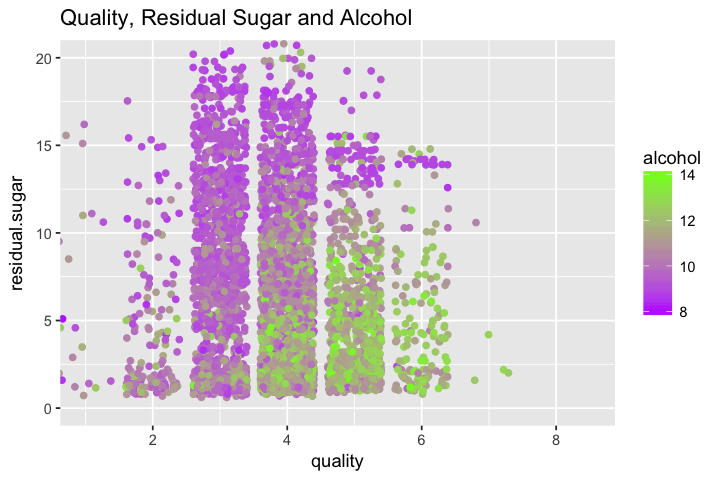

In [147]:
ggplot(aes(x = quality, y = residual.sugar, color = alcohol), data = wine) + 
  geom_point(position='jitter') +
  scale_color_continuous(low = 'darkorchid1', high = 'lawngreen') + 
    coord_cartesian(xlim = c(1, 8.5), ylim = c(0, 20)) + 
  ggtitle('Quality, Residual Sugar and Alcohol')

Here we see that there is a large variabaility in residual sugar values, and that higher alcohol is tied to higher quality ratings as well as lower residual sugar (the green dots being clustered more in the lower right hand corner).

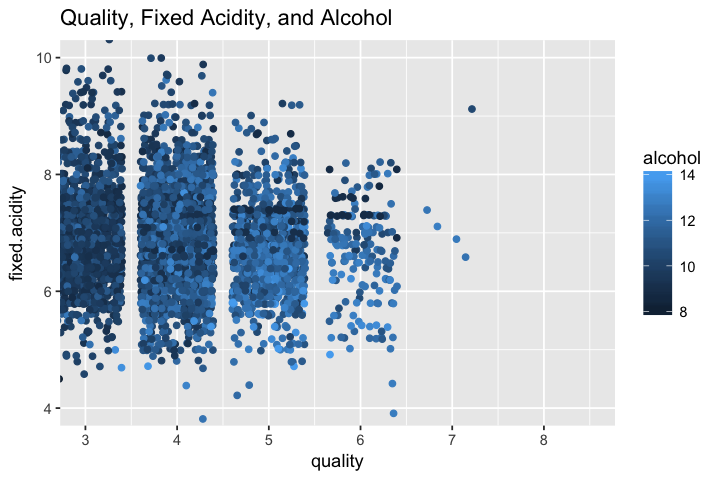

In [148]:
ggplot(aes(x = quality, y = fixed.acidity, color = alcohol), data = wine) + 
  geom_point(position='jitter') +
  coord_cartesian(xlim = c(3, 8.5), ylim=c(4, 10)) + 
  ggtitle('Quality, Fixed Acidity, and Alcohol')

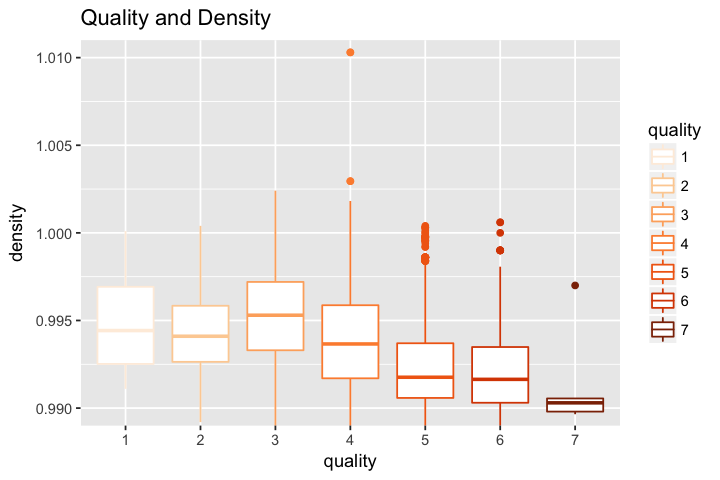

In [149]:
wine$quality <- as.factor(wine$quality)

ggplot(aes(x = quality, y = density), data = wine) +   geom_boxplot(aes(color = quality))+
  scale_color_brewer(palette = 7)+
  coord_cartesian(ylim=c(.99, 1.01)) + 
  ggtitle('Quality and Density')

### Multivariate Analysis

I explored some of the variables with the strongest correlations, including alcohol, residual sugar, quality, fixed acidity, and density. I experimented with different types of plots to see what was the most illuminating way to represent the data.

### Final Plots and Summary

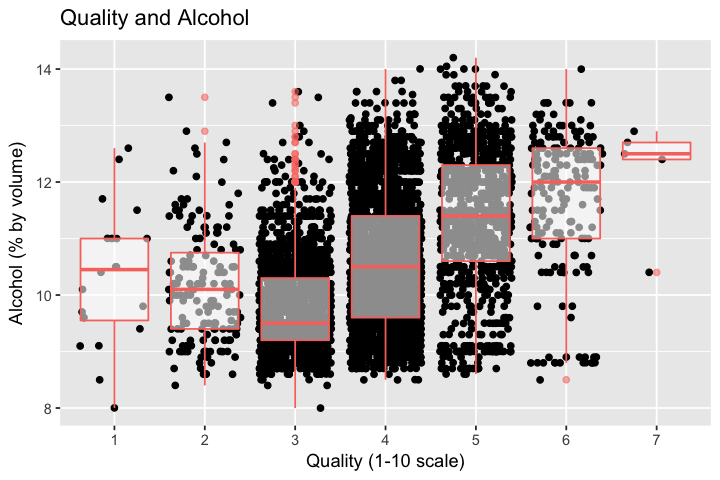

In [150]:
ggplot(aes(x = quality, y = alcohol), data = wine) + 
  geom_point(position='jitter') +
  geom_boxplot(aes(color= "red", alpha = .25))+
  ggtitle("Quality and Alcohol") + 
  xlab("Quality (1-10 scale)") +
  ylab("Alcohol (% by volume)")+
  theme(legend.position="none")

What properties are strongly associated with higher quality wines? Here we can see that wines with ratings of 3 and 4 have slightly higher median alcohol contents than those with ratings of 5, but the medians climb steadily upward from there as the quality ratings increase. It's also clear to see from this plot that most wines fall in the 5-7 rating range.

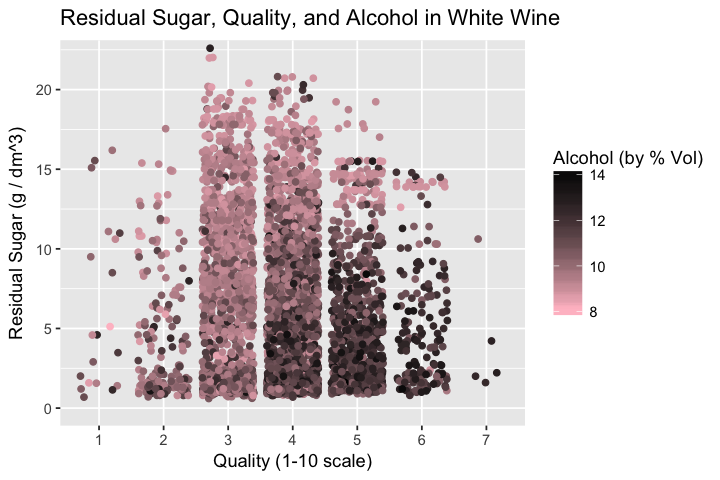

In [151]:
ggplot(aes(x = quality, y = residual.sugar, color = alcohol), data = wine) + 
  geom_point(position = "jitter") +
  scale_color_continuous(low = 'pink', high = 'black') +
  coord_cartesian(ylim=c(0, 22))+
  ggtitle("Residual Sugar, Quality, and Alcohol in White Wine") + 
  xlab("Quality (1-10 scale)") + 
  ylab("Residual Sugar (g / dm^3)") +
  labs(color = "Alcohol (by % Vol)")

Here we see that these three variables are related. Higher alcohol content (the black dots) is more concentrated on the lower right side of the plot, where residual sugar is lower and quality ratings are higher. Lower alcohol content is associated with lower quality ratings and higher residual sugar. 

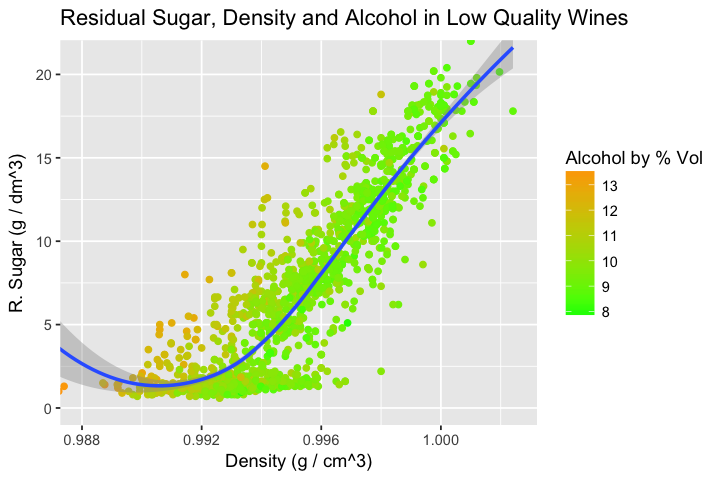

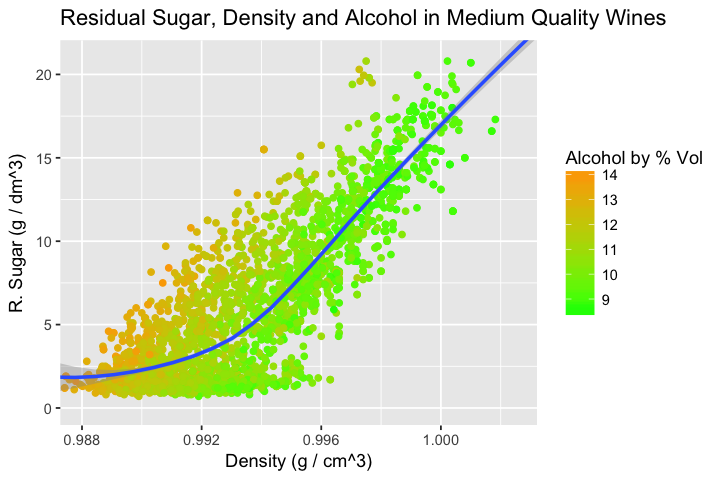

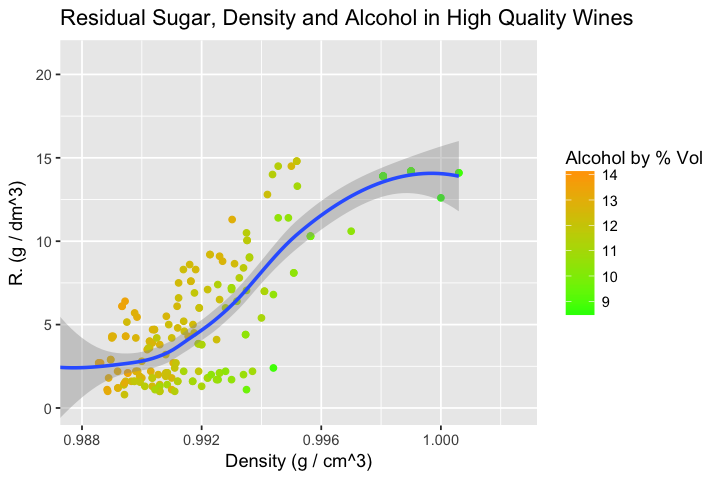

In [175]:
low_qual <- subset(wine, quality == 1 | quality == 2 | quality == 3)
med_qual <- subset(wine, quality == 4 | quality == 5)
high_qual <- subset(wine, quality == 6 | quality == 7 | quality == 9)

ggplot(aes(x = density, y = residual.sugar, color = alcohol), data = low_qual) +
  geom_point() + 
  scale_color_continuous(low = "green", high = "orange")+
  coord_cartesian(xlim = c(.988, 1.0025), ylim = c(0, 21))+
  ggtitle("Residual Sugar, Density and Alcohol in Low Quality Wines") +
  ylab("R. Sugar (g / dm^3)") +
  xlab("Density (g / cm^3)") +
  labs(color = "Alcohol by % Vol") + 
  geom_smooth(method='loess')

ggplot(aes(x = density, y = residual.sugar, color = alcohol), data = med_qual) +
  geom_point() + 
  scale_color_continuous(low = "green", high = "orange")+
  coord_cartesian(xlim = c(.988, 1.0025), ylim = c(0, 21))+
    ggtitle("Residual Sugar, Density and Alcohol in Medium Quality Wines") +
  ylab("R. Sugar (g / dm^3)") +
  xlab("Density (g / cm^3)") +
  labs(color = "Alcohol by % Vol") +
  geom_smooth(method='loess')

ggplot(aes(x = density, y = residual.sugar, color = alcohol), data = high_qual) +
  geom_point() + 
  scale_color_continuous(low = "green", high = "orange")+
  coord_cartesian(xlim = c(.988, 1.0025), ylim = c(0, 21))+
    ggtitle("Residual Sugar, Density and Alcohol in High Quality Wines")+
  ylab("R. (g / dm^3)") +
  xlab("Density (g / cm^3)") +
  labs(color = "Alcohol by % Vol") +
  geom_smooth(method='loess')


Finally, these three plots look at residual sugar, density and alcohol in three different groups: low quality wines (those receiving a rating of 3, 4, or 5), medium quality (6 or 7) and high quality (8-9). 

We can see the steepest trend line in the low quality wines, meaning that they have more sugar and less density compared to the medium quality wines. The high quality wines have a few data points in the high residual sugar/ low alcohol/high density region, but they are mostly concentrated in the bottom left corner with low residual sugar/high alcohol/low density.

### Reflection

I was interested to learn that higher quality white wines tend to have higher alcohol contents, lower sugar contents, and be less dense than lower quality wines. However, lack of sweetness did not necessarily mean the higher quality wines were more acidic. 

I was surprised to find that density and residual sugar were the most strongly related variables. Residual sugar and alcohol also have a negative relationship, so perhaps alcohol is less dense than other elements in wine.